## REG.NO : 212224060031
## NAME   : V.Atchaya

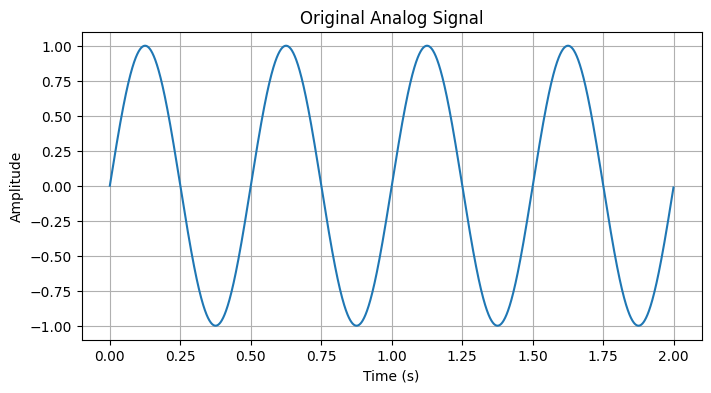

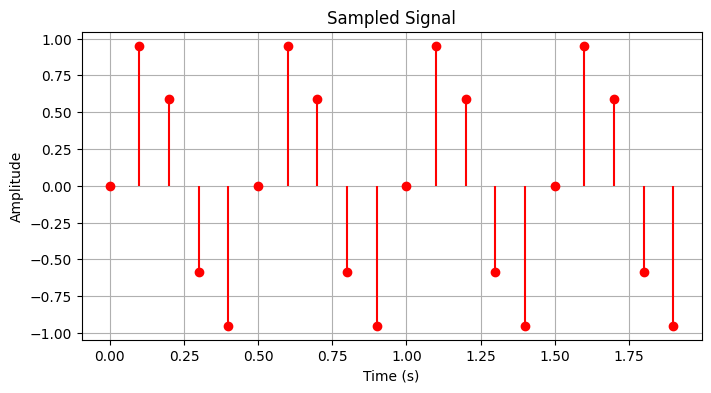

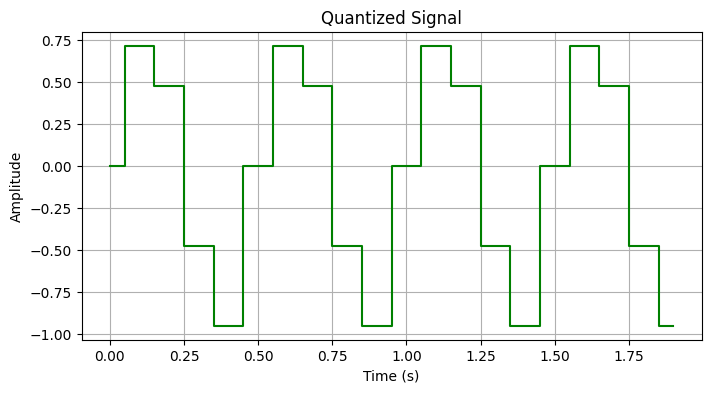

Binary Codes for Samples: ['100', '111', '110', '010', '000', '100', '111', '110', '010', '000', '100', '111', '110', '010', '000', '100', '111', '110', '010', '000']


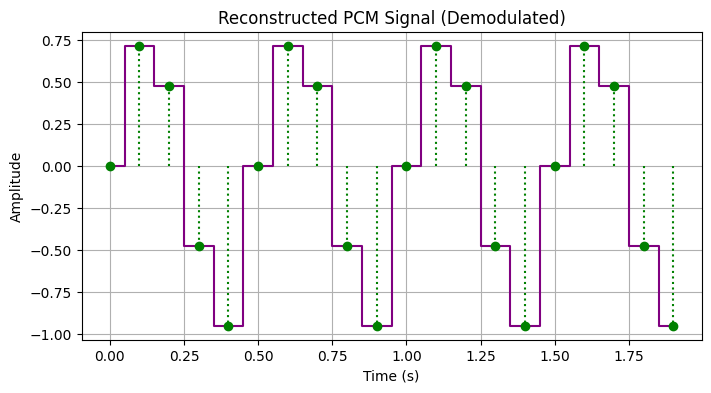

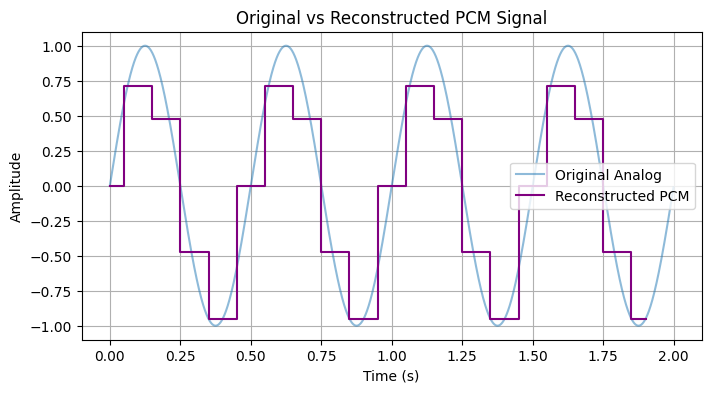

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# ===== Signal Parameters =====
frequency = 2 # Hz
amplitude = 1
duration = 2 # seconds
analog_rate = 1000 # Hz for smooth analog plot
sample_rate = 10 # Hz sampling
num_levels = 8 # Quantization levels
# ===== Analog Signal =====
t = np.linspace(0, duration, int(analog_rate * duration), endpoint=False)
analog_signal = amplitude * np.sin(2 * np.pi * frequency * t)
plt.figure(figsize=(8,4))
plt.plot(t, analog_signal)
plt.title("Original Analog Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
# ===== Sampling =====
t_samp = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
sampled_signal = amplitude * np.sin(2 * np.pi * frequency * t_samp)
plt.figure(figsize=(8,4))
plt.stem(t_samp, sampled_signal, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title("Sampled Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
# ===== Quantization =====
max_amp = np.max(np.abs(sampled_signal))
step = 2 * max_amp / num_levels
indices = np.round((sampled_signal + max_amp) / step)
indices = np.clip(indices, 0, num_levels-1).astype(int)
quantized_signal = (indices * step) - max_amp
plt.figure(figsize=(8,4))
plt.step(t_samp, quantized_signal, where='mid', color='g')
plt.title("Quantized Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
# ===== PCM Encoding (Binary) =====
num_bits = int(np.log2(num_levels))
binary_codes = [np.binary_repr(idx, width=num_bits) for idx in indices]
print("Binary Codes for Samples:", binary_codes)
# ===== Transmission (simulated) =====
# For demonstration, we assume noiseless channel
transmitted_codes = binary_codes.copy()
# ===== PCM Decoding =====
decoded_indices = np.array([int(code, 2) for code in transmitted_codes])
decoded_signal = (decoded_indices * step) - max_amp
plt.figure(figsize=(8,4))
plt.step(t_samp, decoded_signal, where='mid', color='purple')
plt.stem(t_samp, decoded_signal, linefmt='g:', markerfmt='go', basefmt=' ')
plt.title("Reconstructed PCM Signal (Demodulated)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
# ===== Optional: Compare Original Analog and Reconstructed Signal =====
plt.figure(figsize=(8,4))
plt.plot(t, analog_signal, label='Original Analog', alpha=0.5)
plt.step(t_samp, decoded_signal, where='mid', color='purple', label='Reconstructed PCM')
plt.title("Original vs Reconstructed PCM Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()